In [1]:
import os
from fair import FAIR
from fair.io import read_properties
from fair.interface import initialise
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

/Users/sanderson/Documents/GitHub/explore-extensions/explore-extensions/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
f = FAIR()

In [3]:
scns=["high-extension", "high-overshoot", "medium-extension", "medium-overshoot", "low", "verylow", "verylow-overshoot"]
f.define_time(1750, 2501, 1)
f.define_scenarios(scns)
species, properties = read_properties('../data/fair-parameters/species_configs_properties_1.4.1.csv')
f.define_species(species, properties)
f.ch4_method='Thornhill2021'
df_configs = pd.read_csv('../data/fair-parameters/calibrated_constrained_parameters_1.4.1.csv', index_col=0)
f.define_configs(df_configs.index[:])
f.allocate()

In [4]:
f.fill_from_csv(
    emissions_file='../data/emissions/extensions_1750-2500.csv',
    forcing_file='../data/forcing/volcanic_solar.csv',
)

In [5]:
df_emis = pd.read_csv('../data/emissions/extensions_1750-2500.csv')#


In [6]:
scn='high-overshoot'
e_hos=np.array([[2125.5,f.emissions.loc[dict(scenario=scn,specie='CO2 FFI',timepoints=2124.5)][0]],
       [2225.5,-30],
       [2350.5,-30],
       [2400.5,0],
       [2500.5,0]])
e_hos
e_b4=f.emissions.loc[dict(specie='CO2 FFI',config=1234,scenario=scn,timepoints=slice(1750,2125))]
t_aft=f.emissions.timepoints.loc[dict(timepoints=slice(2125,2501))]
e_aft=f.emissions.loc[dict(timepoints=slice(2125,2501),specie='CO2 FFI',scenario=scn,config=1234)]

e_aft[:]=np.interp(t_aft,e_hos[:,0],e_hos[:,1])
f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,timepoints=slice(2125,2501))]=e_aft


df_emis.loc[(df_emis['variable']=="CO2 FFI") & (df_emis['scenario']==scn),"1750.5":"2500.5"]=f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,config=1234)]


In [7]:
scn='medium-overshoot'
e_hos=np.array([[2125.5,f.emissions.loc[dict(scenario=scn,specie='CO2 FFI',timepoints=2124.5)][0]],
       [2200.5,-27],
       [2350.5,-27],
       [2400.5,0],
       [2500.5,0]])
e_hos
e_b4=f.emissions.loc[dict(specie='CO2 FFI',config=1234,scenario=scn,timepoints=slice(1750,2125))]
t_aft=f.emissions.timepoints.loc[dict(timepoints=slice(2125,2501))]
e_aft=f.emissions.loc[dict(timepoints=slice(2125,2501),specie='CO2 FFI',scenario=scn,config=1234)]

e_aft[:]=np.interp(t_aft,e_hos[:,0],e_hos[:,1])
f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,timepoints=slice(2125,2501))]=e_aft


df_emis.loc[(df_emis['variable']=="CO2 FFI") & (df_emis['scenario']==scn),"1750.5":"2500.5"]=f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,config=1234)]


In [8]:
scn='verylow-overshoot'
e2125=f.emissions.loc[dict(scenario=scn,specie='CO2 FFI',timepoints=2124.5)][0]
e_hos=np.array([[2125.5,e2125],
       [2275.5,e2125],
       [2325.5,0],
       [2500.5,0]])
e_hos
e_b4=f.emissions.loc[dict(specie='CO2 FFI',config=1234,scenario=scn,timepoints=slice(1750,2125))]
t_aft=f.emissions.timepoints.loc[dict(timepoints=slice(2125,2501))]
e_aft=f.emissions.loc[dict(timepoints=slice(2125,2501),specie='CO2 FFI',scenario=scn,config=1234)]

e_aft[:]=np.interp(t_aft,e_hos[:,0],e_hos[:,1])
f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,timepoints=slice(2125,2501))]=e_aft


df_emis.loc[(df_emis['variable']=="CO2 FFI") & (df_emis['scenario']==scn),"1750.5":"2500.5"]=f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,config=1234)]


In [9]:
scn='low'
e2125=f.emissions.loc[dict(scenario=scn,specie='CO2 FFI',timepoints=2124.5)][0]
e_hos=np.array([[2125.5,e2125],
       [2175.5,e2125],
       [2200.5,0],
       [2500.5,0]])
e_hos
e_b4=f.emissions.loc[dict(specie='CO2 FFI',config=1234,scenario=scn,timepoints=slice(1750,2125))]
t_aft=f.emissions.timepoints.loc[dict(timepoints=slice(2125,2501))]
e_aft=f.emissions.loc[dict(timepoints=slice(2125,2501),specie='CO2 FFI',scenario=scn,config=1234)]

e_aft[:]=np.interp(t_aft,e_hos[:,0],e_hos[:,1])
f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,timepoints=slice(2125,2501))]=e_aft


df_emis.loc[(df_emis['variable']=="CO2 FFI") & (df_emis['scenario']==scn),"1750.5":"2500.5"]=f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,config=1234)]


In [10]:
scn='verylow'
e2125=f.emissions.loc[dict(scenario=scn,specie='CO2 FFI',timepoints=2124.5)][0]
e_hos=np.array([[2125.5,e2125],
       [2225.5,e2125],
       [2275.5,0],
       [2500.5,0]])
e_hos
e_b4=f.emissions.loc[dict(specie='CO2 FFI',config=1234,scenario=scn,timepoints=slice(1750,2125))]
t_aft=f.emissions.timepoints.loc[dict(timepoints=slice(2125,2501))]
e_aft=f.emissions.loc[dict(timepoints=slice(2125,2501),specie='CO2 FFI',scenario=scn,config=1234)]

e_aft[:]=np.interp(t_aft,e_hos[:,0],e_hos[:,1])
f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,timepoints=slice(2125,2501))]=e_aft


df_emis.loc[(df_emis['variable']=="CO2 FFI") & (df_emis['scenario']==scn),"1750.5":"2500.5"]=f.emissions.loc[dict(specie='CO2 FFI',scenario=scn,config=1234)]


In [11]:
colors = {
    'high-extension': '#800000',
    'high-overshoot': '#ff0000',
    'medium-extension': '#c87820',
    'medium-overshoot': '#d3a640',
    'low': '#098740',
    'verylow': '#0080d0',
    'verylow-overshoot': '#100060',
}

In [12]:
os.makedirs('../plots', exist_ok=True)

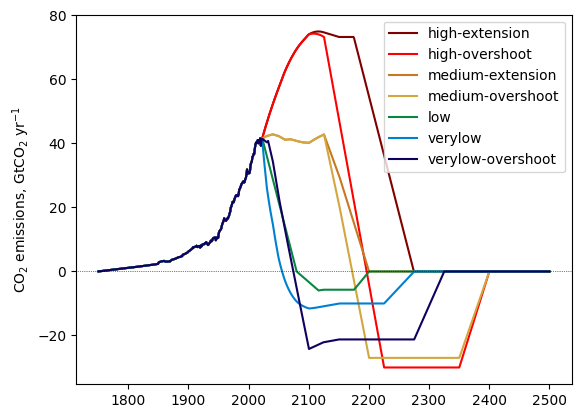

In [13]:
fig, ax = pl.subplots()
for scenario in f.scenarios:
    ax.plot(
        f.timepoints,
        (
            f.emissions.sel(scenario=scenario, specie="CO2 FFI", config=f.configs[0]) +
            f.emissions.sel(scenario=scenario, specie="CO2 AFOLU", config=f.configs[0])
        ),
        label=scenario,
        color=colors[scenario]
    )
ax.set_ylabel("CO$_2$ emissions, GtCO$_2$ yr$^{-1}$")
ax.axhline(ls=':', color='k', lw=0.5)
ax.legend();
pl.savefig('../plots/co2_emissions.png')

In [14]:
vars

<function vars>

In [15]:
for scn in scns:
    vars=df_emis['variable'].loc[df_emis['variable']!="GHG"].unique()
    tmp_ghg=df_emis.loc[(df_emis['variable']=='GHG')&(df_emis['scenario']==scn),"1750.5":].to_numpy()*0.
    for i,v in enumerate(vars):
        emf=df_emis['ar6_gwp_mass_adjusted'].loc[(df_emis['variable']==v)&(df_emis['scenario']==scn)]
        
        tmp_ghg=np.nan_to_num(tmp_ghg)+np.nan_to_num(emf.values*df_emis.loc[(df_emis['variable']==v)&(df_emis['scenario']==scn),"1750.5":].to_numpy())
    df_emis.loc[(df_emis['variable']=='GHG')&(df_emis['scenario']==scn),"1750.5":]=tmp_ghg


In [16]:
df_emis.to_csv('../data/emissions/extensions_bms_1750-2500.csv')

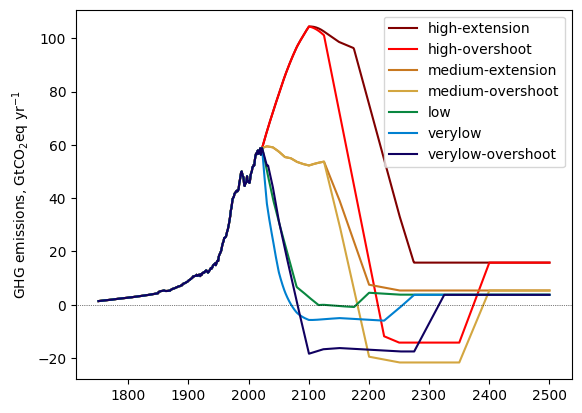

In [17]:
fig, ax = pl.subplots()
for scenario in f.scenarios:
    ax.plot(
        f.timepoints,
        df_emis.loc[(df_emis['variable']=="GHG") & (df_emis['scenario']==scenario), "1750.5":].squeeze() / 1e6,
        label=scenario,
        color=colors[scenario]
    )
ax.set_ylabel("GHG emissions, GtCO$_2$eq yr$^{-1}$")
ax.axhline(ls=':', color='k', lw=0.5)
ax.legend();
pl.savefig('../plots/ghg_emissions.png')

In [18]:
f.fill_species_configs('../data/fair-parameters/species_configs_properties_1.4.1.csv')

In [19]:
f.override_defaults('../data/fair-parameters/calibrated_constrained_parameters_1.4.1.csv')

In [20]:
initialise(f.concentration, f.species_configs["baseline_concentration"])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)
initialise(f.ocean_heat_content_change, 0)

In [21]:
f.run()

Running 5887 projections in parallel: 100%|██████████| 751/751 [02:54<00:00,  4.30timesteps/s]


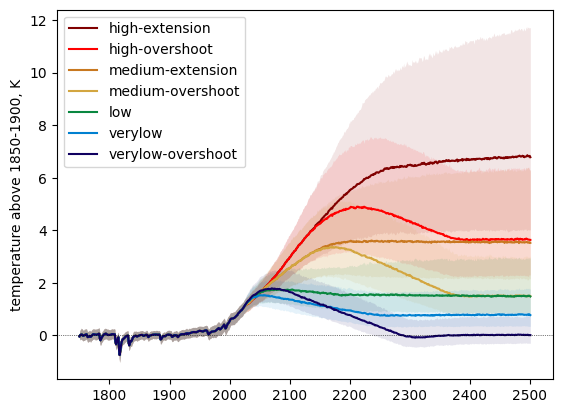

In [22]:
fig, ax = pl.subplots()
for scenario in f.scenarios:
    ax.fill_between(
        f.timebounds,
        (
            f.temperature.sel(scenario=scenario, layer=0)-
            f.temperature.sel(scenario=scenario, layer=0, timebounds=np.arange(1850,1902)).mean(dim='timebounds')
        ).quantile(0.05, dim='config'),
        (
            f.temperature.sel(scenario=scenario, layer=0)-
            f.temperature.sel(scenario=scenario, layer=0, timebounds=np.arange(1850,1902)).mean(dim='timebounds')
        ).quantile(0.95, dim='config'),
        color=colors[scenario],
        lw=0,
        alpha=0.1
    )
    ax.plot(
        f.timebounds,
        (
            f.temperature.sel(scenario=scenario, layer=0)-
            f.temperature.sel(scenario=scenario, layer=0, timebounds=np.arange(1850,1902)).mean(dim='timebounds')
        ).median(dim='config'),
        label=scenario,
        color=colors[scenario]
    )
ax.axhline(0, ls=':', color='k', lw=0.5)
ax.set_ylabel('temperature above 1850-1900, K')
pl.legend();
pl.savefig('../plots/temperature.png')

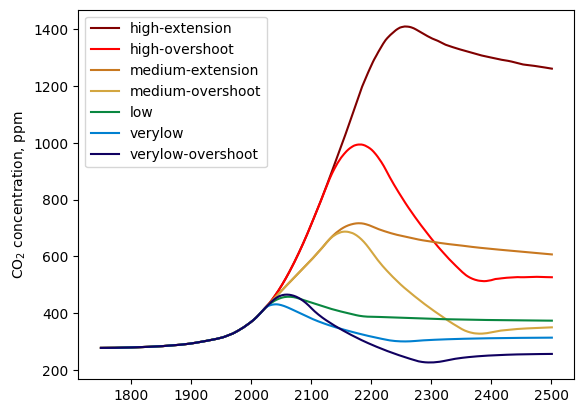

In [23]:
fig, ax = pl.subplots()
for scenario in f.scenarios:
    ax.plot(
        f.timebounds,
        f.concentration.sel(scenario=scenario, specie="CO2").median(dim='config'),
        label=scenario,
        color=colors[scenario]
    )
ax.set_ylabel('CO$_2$ concentration, ppm')
pl.legend();
pl.savefig('../plots/co2_concentration.png')

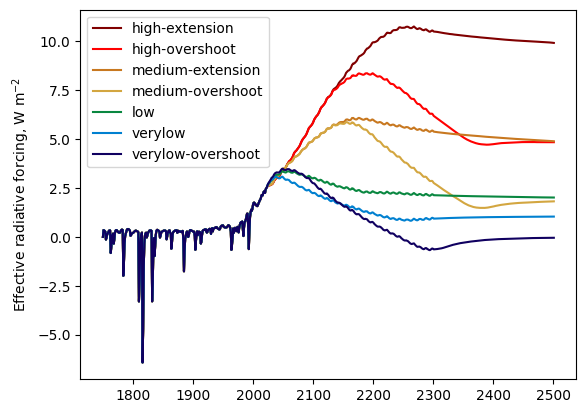

In [24]:
fig, ax = pl.subplots()
for scenario in f.scenarios:
    pl.plot(
        f.timebounds,
        f.forcing_sum.sel(scenario=scenario).median(dim='config'),
        label=scenario,
        color=colors[scenario]
    )
ax.set_ylabel('Effective radiative forcing, W m$^{-2}$')
pl.legend();
pl.savefig('../plots/forcing.png')

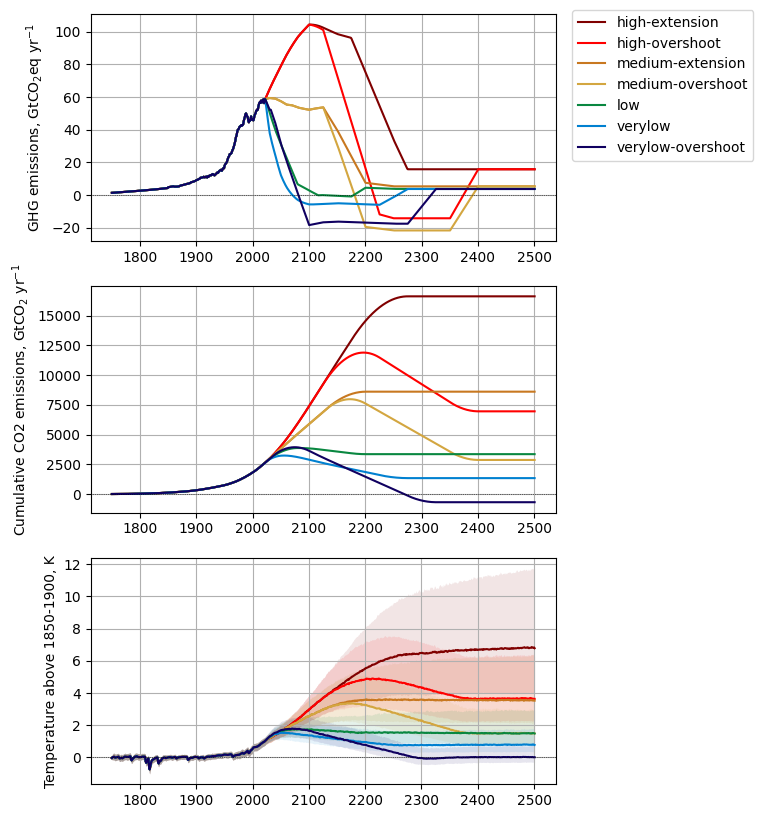

In [25]:
fig, ax = pl.subplots(3,1,figsize=[6,10])
for scenario in f.scenarios:
    ax[0].plot(
        f.timepoints,
        df_emis.loc[(df_emis['variable']=="GHG") & (df_emis['scenario']==scenario), "1750.5":].squeeze() / 1e6,
        label=scenario,
        color=colors[scenario]
    )
ax[0].set_ylabel("GHG emissions, GtCO$_2$eq yr$^{-1}$")
ax[0].axhline(ls=':', color='k', lw=0.5)
ax[0].legend(bbox_to_anchor=(1.02, 1.05))
ax[0].grid()
for scenario in f.scenarios:
    ax[1].plot(
        f.timepoints,
        f.cumulative_emissions.sel(scenario=scenario, specie='CO2',config=1234)[:-1],
        label=scenario,
        color=colors[scenario]
    )
ax[1].set_ylabel("Cumulative CO2 emissions, GtCO$_2$ yr$^{-1}$")
ax[1].axhline(ls=':', color='k', lw=0.5)
ax[1].grid()


for scenario in f.scenarios:
    ax[2].fill_between(
        f.timebounds,
        (
            f.temperature.sel(scenario=scenario, layer=0)-
            f.temperature.sel(scenario=scenario, layer=0, timebounds=np.arange(1850,1902)).mean(dim='timebounds')
        ).quantile(0.05, dim='config'),
        (
            f.temperature.sel(scenario=scenario, layer=0)-
            f.temperature.sel(scenario=scenario, layer=0, timebounds=np.arange(1850,1902)).mean(dim='timebounds')
        ).quantile(0.95, dim='config'),
        color=colors[scenario],
        lw=0,
        alpha=0.1
    )
    ax[2].plot(
        f.timebounds,
        (
            f.temperature.sel(scenario=scenario, layer=0)-
            f.temperature.sel(scenario=scenario, layer=0, timebounds=np.arange(1850,1902)).mean(dim='timebounds')
        ).median(dim='config'),
        label=scenario,
        color=colors[scenario]
    )
ax[2].axhline(0, ls=':', color='k', lw=0.5)
ax[2].set_ylabel('Temperature above 1850-1900, K')
ax[2].grid()
pl.savefig('../plots/ghg_emissions.png')